# Linear regression model

Before we compare the performance of different models, we need to address the following questions:

- Which set of features should we use?
- Should the model parameters depend on stocks? In other words, should we fit the model for each stock separately or should we fit a single model for all stocks?
- Should we dynamically select a subset of the features across different historical periods based on cross-validation? 

To address these three questions, we backtest the performance of linear regression models with various configulations. Specifically, we consider four feature sets:
- ***baseline***: beta, return_, volume
- ***top 2 features***: two most important features based on feature engineering (small model)
- ***top 5 features***: five most important features based on feature engineering (medium model)
- ***top 14 features***: fourteen most important features based on feature engineering (large model)


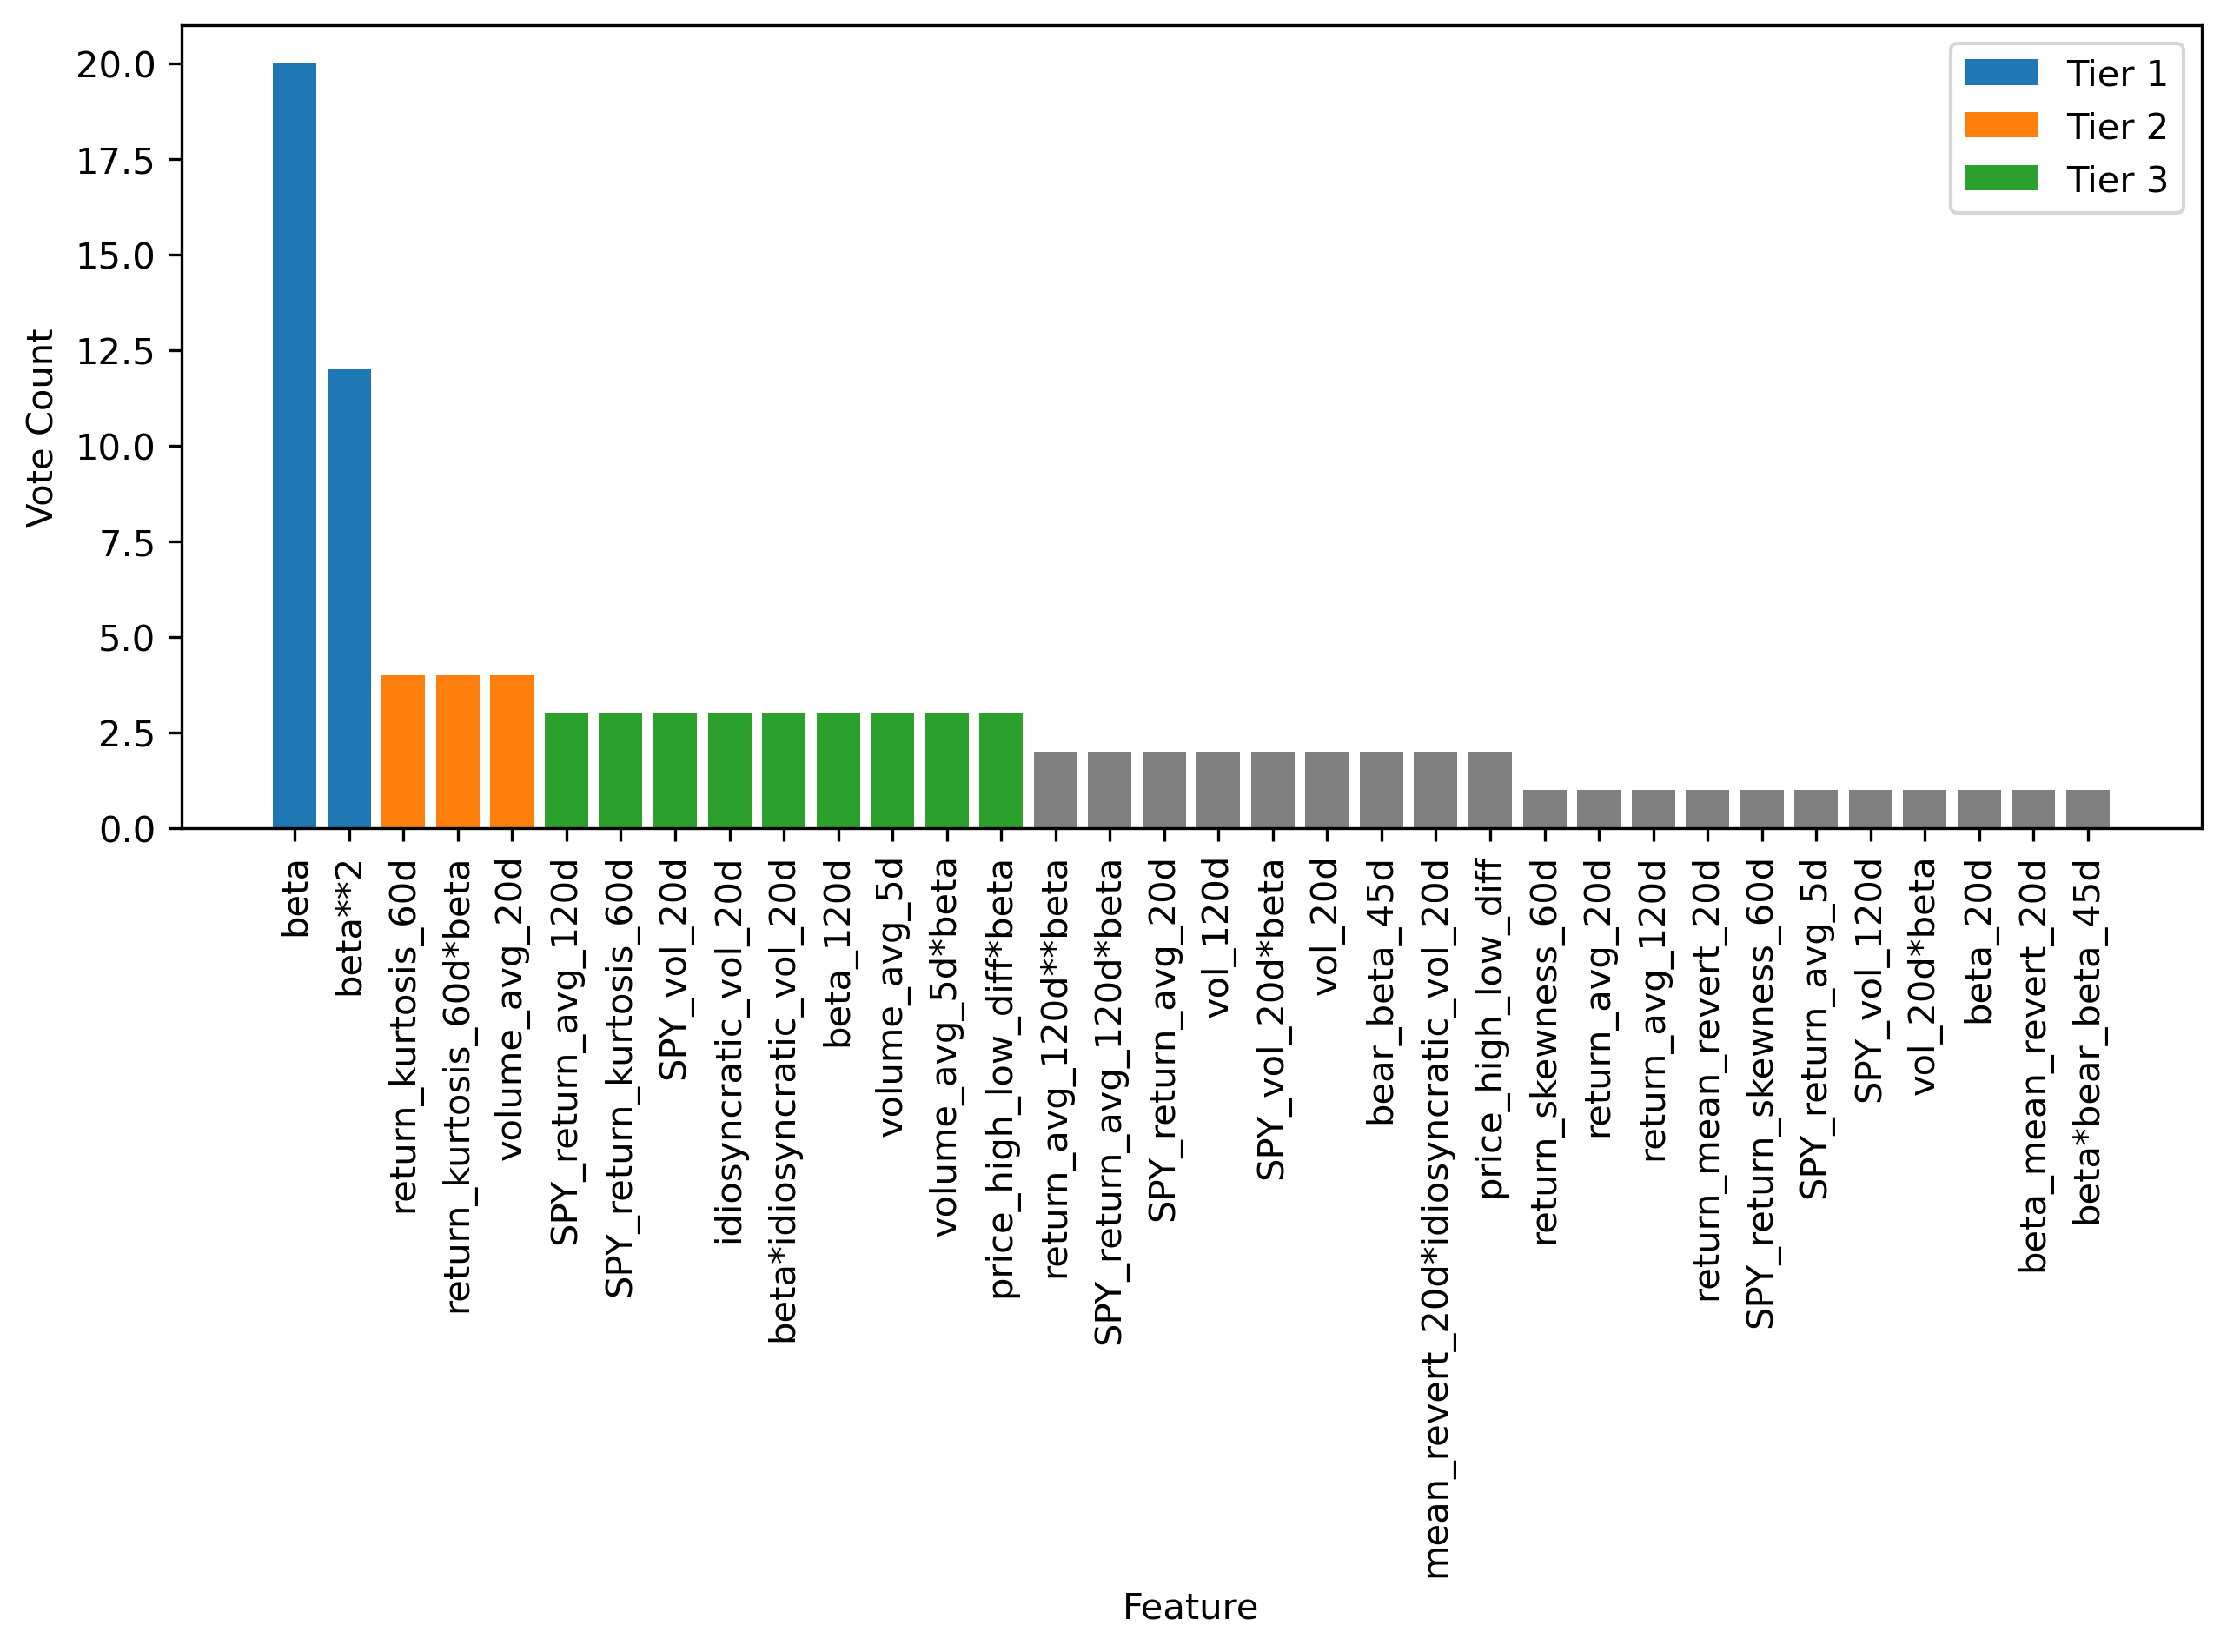

In [2]:
import os
from IPython.display import Image, display
display(Image(filename=os.path.join(os.getcwd(), "..", "feature_engineer", "feature_vote_summary.png"), width=600))


At the same time, we consider four parameter estimation modes:
- ***stock independent, autoselect features***: The model is fitted on all stocks and the features are varied based on the model performance on validation set.
- ***stock independent, fixed features***: The model is fitted on all stocks and the features are fixed based on the model performance on validation set.
- ***stock dependent, autoselect features***: The model is fitted on each stock separately and the features are varied based on the model performance on validation set.
- ***stock dependent, fixed features***: The model is fitted on each stock separately and the features are fixed based on the model performance on validation set.

## 1. Baseline model
We backtest the performance of a linear regression model with baseline features (beta, return_, volume) by calculating the mean square error (MSE) on the test set. 

Evaluating model performance - is_stock_dependent: False, auto_select_feature: True
Evaluating model performance - is_stock_dependent: False, auto_select_feature: False
Evaluating model performance - is_stock_dependent: True, auto_select_feature: False
Evaluating model performance - is_stock_dependent: True, auto_select_feature: True


Text(0.5, 1.0, 'Baseline Model Performance')

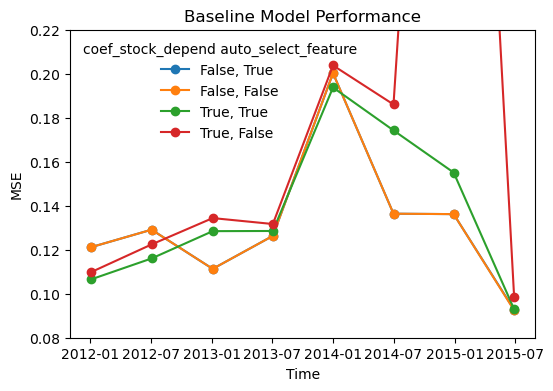

In [10]:
import os, sys, copy, scipy, datetime, tqdm, collections, itertools, pickle, json
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from contextlib import redirect_stdout

import model_lib

if __name__ == "__main__":
    sys.path.append(os.path.join(os.getcwd(), '..'))

import utils

file_name = os.path.join(os.getcwd(), "..", "feature_engineer", "feature_engineer_summary.pkl")
with open(file_name, "rb") as f:
    feature_selection_summary = pickle.load(f)
feature_pool = feature_selection_summary["selected_feature"]

log = collections.defaultdict(dict)

current_feature = ["beta", "return_", "volume"]
feature_label = "baseline"
model = model_lib.model_linear_regression(current_feature, feature_label)
model.model_performance(is_stock_dependent=False, auto_select_feature=True)
model.model_performance(is_stock_dependent=False, auto_select_feature=False)
model.model_performance(is_stock_dependent=True, auto_select_feature=False)
model.model_performance(is_stock_dependent=True, auto_select_feature=True)
file_name = model.model_performance_file_name
with open(file_name, "rb") as f:
    model_performance_summary = pickle.load(f)
log[feature_label] = model_performance_summary

plt.figure(figsize=(6, 4))
plt.plot(model_performance_summary["stock_dependent: False, auto_select_feature: True"]["time_hist"], model_performance_summary["stock_dependent: False, auto_select_feature: True"]["mse_hist"], "-o", label="False, True")
plt.plot(model_performance_summary["stock_dependent: False, auto_select_feature: False"]["time_hist"], model_performance_summary["stock_dependent: False, auto_select_feature: False"]["mse_hist"], "-o", label="False, False")
plt.plot(model_performance_summary["stock_dependent: True, auto_select_feature: True"]["time_hist"], model_performance_summary["stock_dependent: True, auto_select_feature: True"]["mse_hist"], "-o", label="True, True")
plt.plot(model_performance_summary["stock_dependent: True, auto_select_feature: False"]["time_hist"], model_performance_summary["stock_dependent: True, auto_select_feature: False"]["mse_hist"], "-o", label="True, False")
plt.legend(loc="upper left", title="coef_stock_depend auto_select_feature", framealpha=0)
plt.xlabel("Time"); plt.ylabel("MSE")
plt.ylim(0.08, 0.22)
plt.title("Baseline Model Performance")


## 2. Top 2 features
We backtest the performance of a linear regression model with 2 most important features from feature engineering by calculating the mean square error (MSE) on the test set.

Evaluating model performance - is_stock_dependent: False, auto_select_feature: True
Evaluating model performance - is_stock_dependent: False, auto_select_feature: False
Evaluating model performance - is_stock_dependent: True, auto_select_feature: False
Evaluating model performance - is_stock_dependent: True, auto_select_feature: True


Text(0.5, 1.0, 'Top 2 Feature Model Performance')

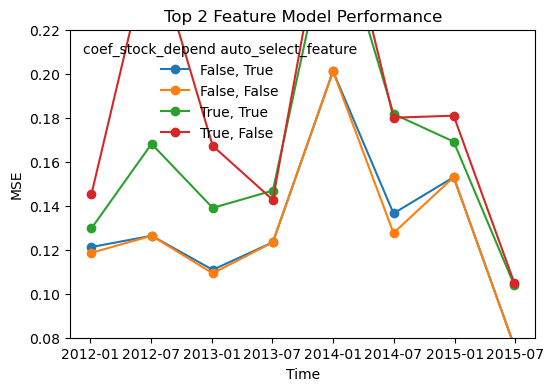

In [4]:
current_feature_pool = feature_pool[0:2]
feature_label = "top2_feature"
model = model_lib.model_linear_regression(current_feature_pool, feature_label)
model.model_performance(is_stock_dependent=False, auto_select_feature=True)
model.model_performance(is_stock_dependent=False, auto_select_feature=False)
model.model_performance(is_stock_dependent=True, auto_select_feature=False)
model.model_performance(is_stock_dependent=True, auto_select_feature=True)
file_name = model.model_performance_file_name
with open(file_name, "rb") as f:
    model_performance_summary = pickle.load(f)
log[feature_label] = model_performance_summary

plt.figure(figsize=(6, 4))
plt.plot(model_performance_summary["stock_dependent: False, auto_select_feature: True"]["time_hist"], model_performance_summary["stock_dependent: False, auto_select_feature: True"]["mse_hist"], "-o", label="False, True")
plt.plot(model_performance_summary["stock_dependent: False, auto_select_feature: False"]["time_hist"], model_performance_summary["stock_dependent: False, auto_select_feature: False"]["mse_hist"], "-o", label="False, False")
plt.plot(model_performance_summary["stock_dependent: True, auto_select_feature: True"]["time_hist"], model_performance_summary["stock_dependent: True, auto_select_feature: True"]["mse_hist"], "-o", label="True, True")
plt.plot(model_performance_summary["stock_dependent: True, auto_select_feature: False"]["time_hist"], model_performance_summary["stock_dependent: True, auto_select_feature: False"]["mse_hist"], "-o", label="True, False")
plt.legend(loc="upper left", title="coef_stock_depend auto_select_feature", framealpha=0)
plt.xlabel("Time"); plt.ylabel("MSE")
plt.ylim(0.08, 0.22)
plt.title("Top 2 Feature Model Performance")

## 3. Top 5 features
We backtest the performance of a linear regression model with 5 most important features from feature engineering by calculating the mean square error (MSE) on the test set.

Evaluating model performance - is_stock_dependent: False, auto_select_feature: True
Evaluating model performance - is_stock_dependent: False, auto_select_feature: False
Evaluating model performance - is_stock_dependent: True, auto_select_feature: False
Evaluating model performance - is_stock_dependent: True, auto_select_feature: True


Text(0.5, 1.0, 'Top 5 Feature Model Performance')

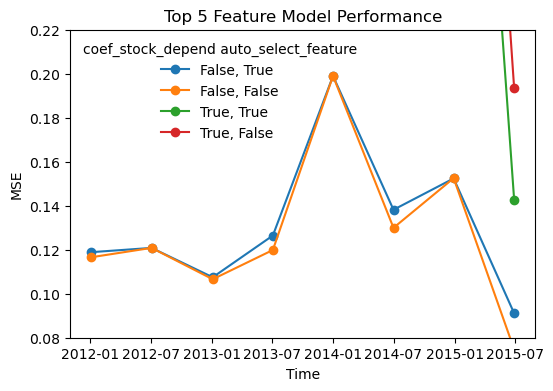

In [5]:
current_feature_pool = feature_pool[0:5]
feature_label = "top5_feature"
model = model_lib.model_linear_regression(current_feature_pool, feature_label)
model.model_performance(is_stock_dependent=False, auto_select_feature=True)
model.model_performance(is_stock_dependent=False, auto_select_feature=False)
model.model_performance(is_stock_dependent=True, auto_select_feature=False)
model.model_performance(is_stock_dependent=True, auto_select_feature=True)
file_name = model.model_performance_file_name
with open(file_name, "rb") as f:
    model_performance_summary = pickle.load(f)
log[feature_label] = model_performance_summary

plt.figure(figsize=(6, 4))
plt.plot(model_performance_summary["stock_dependent: False, auto_select_feature: True"]["time_hist"], model_performance_summary["stock_dependent: False, auto_select_feature: True"]["mse_hist"], "-o", label="False, True")
plt.plot(model_performance_summary["stock_dependent: False, auto_select_feature: False"]["time_hist"], model_performance_summary["stock_dependent: False, auto_select_feature: False"]["mse_hist"], "-o", label="False, False")
plt.plot(model_performance_summary["stock_dependent: True, auto_select_feature: True"]["time_hist"], model_performance_summary["stock_dependent: True, auto_select_feature: True"]["mse_hist"], "-o", label="True, True")
plt.plot(model_performance_summary["stock_dependent: True, auto_select_feature: False"]["time_hist"], model_performance_summary["stock_dependent: True, auto_select_feature: False"]["mse_hist"], "-o", label="True, False")
plt.legend(loc="upper left", title="coef_stock_depend auto_select_feature", framealpha=0)
plt.ylim(0.08, 0.22)
plt.xlabel("Time"); plt.ylabel("MSE")
plt.title("Top 5 Feature Model Performance")


## 4. Top 14 features
We backtest the performance of a linear regression model with 14 most important features from feature engineering by calculating the mean square error (MSE) on the test set.

Evaluating model performance - is_stock_dependent: False, auto_select_feature: True
Evaluating model performance - is_stock_dependent: False, auto_select_feature: False
Evaluating model performance - is_stock_dependent: True, auto_select_feature: False
Evaluating model performance - is_stock_dependent: True, auto_select_feature: True


Text(0.5, 1.0, 'Top 14 Feature Model Performance')

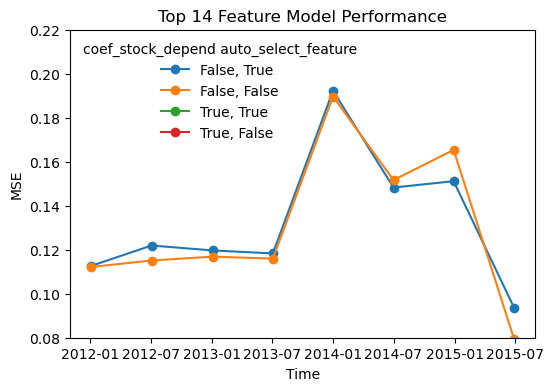

In [7]:
current_feature_pool = feature_pool[0:14]
feature_label = "top14_feature"
model = model_lib.model_linear_regression(current_feature_pool, feature_label)
model.model_performance(is_stock_dependent=False, auto_select_feature=True)
model.model_performance(is_stock_dependent=False, auto_select_feature=False)
model.model_performance(is_stock_dependent=True, auto_select_feature=False)
model.model_performance(is_stock_dependent=True, auto_select_feature=True)
file_name = model.model_performance_file_name
with open(file_name, "rb") as f:
    model_performance_summary = pickle.load(f)
log[feature_label] = model_performance_summary

plt.figure(figsize=(6, 4))
plt.plot(model_performance_summary["stock_dependent: False, auto_select_feature: True"]["time_hist"], model_performance_summary["stock_dependent: False, auto_select_feature: True"]["mse_hist"], "-o", label="False, True")
plt.plot(model_performance_summary["stock_dependent: False, auto_select_feature: False"]["time_hist"], model_performance_summary["stock_dependent: False, auto_select_feature: False"]["mse_hist"], "-o", label="False, False")
plt.plot(model_performance_summary["stock_dependent: True, auto_select_feature: True"]["time_hist"], model_performance_summary["stock_dependent: True, auto_select_feature: True"]["mse_hist"], "-o", label="True, True")
plt.plot(model_performance_summary["stock_dependent: True, auto_select_feature: False"]["time_hist"], model_performance_summary["stock_dependent: True, auto_select_feature: False"]["mse_hist"], "-o", label="True, False")
plt.legend(loc="upper left", title="coef_stock_depend auto_select_feature", framealpha=0)
plt.ylim(0.08, 0.22)
plt.xlabel("Time"); plt.ylabel("MSE")
plt.title("Top 14 Feature Model Performance")


## 5. Summary
We summarize the performance across various feature sets and parameter estimation modes. 

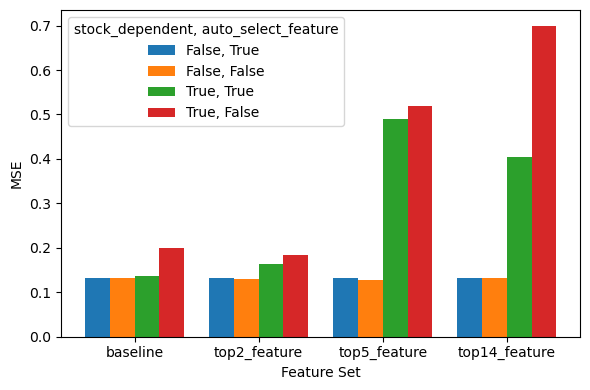

Text(0.5, 0, 'Feature Set')

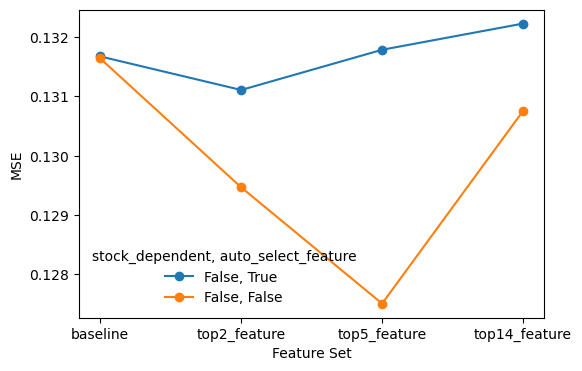

In [8]:
k1 = ["baseline", "top2_feature", "top5_feature", "top14_feature"]
k2 = ["stock_dependent: False, auto_select_feature: True", 
      "stock_dependent: False, auto_select_feature: False", 
      "stock_dependent: True, auto_select_feature: True", 
      "stock_dependent: True, auto_select_feature: False"]
label = ["False, True", "False, False", "True, True", "True, False"]
ar = np.zeros((len(k1), len(k2)))
for i in range(len(k1)):
    for j in range(len(k2)):
        ar[i, j] = np.nanmean(log[k1[i]][k2[j]]["mse_hist"])

plt.figure(figsize=(6, 4))
width = 0.2
x = np.arange(len(k1))
for i in range(len(k2)):
    plt.bar(x + i*width, ar[:, i], width=width, label=label[i])

plt.xticks(x + width * (len(k2) - 1) / 2, k1)
plt.xlabel("Feature Set")
plt.ylabel("MSE")
plt.legend(title="stock_dependent, auto_select_feature")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 4))

mse_summary_1 = []
mse_summary_2 = []

for i in range(len(k1)):
    mse_summary_1.append(np.nanmean(log[k1[i]]["stock_dependent: False, auto_select_feature: True"]["mse_hist"]))
    mse_summary_2.append(np.nanmean(log[k1[i]]["stock_dependent: False, auto_select_feature: False"]["mse_hist"]))

plt.plot(k1, mse_summary_1, "-o", label="False, True")
plt.plot(k1, mse_summary_2, "-o", label="False, False")
plt.legend(title="stock_dependent, auto_select_feature", framealpha=0)
plt.ylabel("MSE"); plt.xlabel("Feature Set")


### Conclusion:
- The top 5 features are the optimal feature set for predicting forward beta. This will be the feature sets in other models.
- We should fit the model across all stocks to make the parameter estimation more robust.
- For linear regression, it is unnecessary further auto-select features based on the model performance on validation set. 

## 6. Interpreting linear regression model
We finally analyze the coefficients of the linear regression model to understand the relationship between the features and the forward beta.

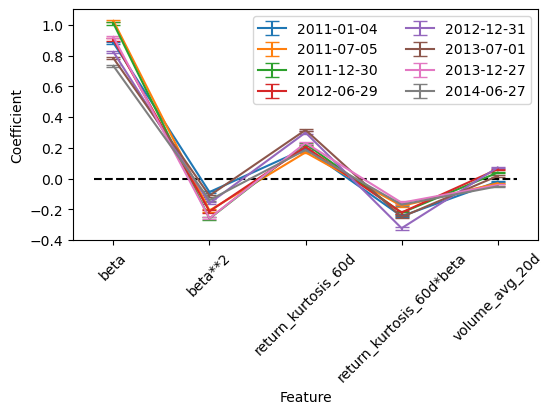

In [6]:
def feature_selection_MSE(selected_feature):
    file_name = os.path.join(os.getcwd(), "../data/data_transformed.npz")
    data = np.load(file_name, allow_pickle=True)
    code_list = data["code_list"].tolist(); time_axis = data["time_axis"].tolist(); forward_beta = data["forward_beta"]
    N = len(code_list); T = len(time_axis)

    file_name = os.path.join(os.getcwd(), "../data/feature_dict.pkl")
    with open(file_name, "rb") as f:
        feature_dict = pickle.load(f)

    time_hist = []; mse_hist = []; model_result_hist = []
    t_idx = np.searchsorted(time_axis, datetime.datetime(2012, 1, 1))

    while True:
        t_train_start_idx = t_idx - 251
        t_train_end_idx = t_idx
        t_test_start_idx = t_train_end_idx + 1
        t_test_end_idx = min(t_test_start_idx + 124, T - 1)

        if t_test_start_idx >= T:
            break

        X = np.zeros((N, T, len(selected_feature))); X[:] = np.nan
        for i in range(len(selected_feature)):
            if selected_feature[i] in feature_dict:
                X[:, :, i] = feature_dict[selected_feature[i]]
            else:
                raise Exception("Feature {} not found.".format(selected_feature[i]))

        X_train = X[:, t_train_start_idx:(t_train_end_idx + 1), :]
        Y_train = forward_beta[:, t_train_start_idx:(t_train_end_idx + 1)]
        data_train = np.concatenate((X_train, Y_train[:, :, np.newaxis]), axis=2)
        data_train = data_train.swapaxes(0, 1).reshape((-1, len(selected_feature)+1)) # make T become the principal axis so that during train-valid data split, respect causality
        data_train = data_train[~np.isnan(data_train).any(axis=1), :]
        data_train = data_train[~np.isinf(data_train).any(axis=1), :]
        X_train = data_train[:, 0:len(selected_feature)]; Y_train = data_train[:, [len(selected_feature)]]

        X_test = X[:, t_test_start_idx:(t_test_end_idx + 1), :]
        Y_test = forward_beta[:, t_test_start_idx:(t_test_end_idx + 1)]
        data_test = np.concatenate((X_test, Y_test[:, :, np.newaxis]), axis=2)
        data_test = data_test.swapaxes(0, 1).reshape((-1, len(selected_feature)+1))
        data_test = data_test[~np.isnan(data_test).any(axis=1), :]
        data_test = data_test[~np.isinf(data_test).any(axis=1), :]
        X_test = data_test[:, 0:len(selected_feature)]; Y_test = data_test[:, [len(selected_feature)]]

        model = utils.linear_regression_vanilla(X_train, Y_train, X_columns=selected_feature, is_normalize=True)
        model.fit(is_output=False)
        if X_test.shape[0] > 0:
            time_hist.append(time_axis[t_train_start_idx])
            model_result_hist.append([model.ols.params[1:], model.ols.bse[1:], model.ols.pvalues[1:]])
            Y_pred = model.predict(X_test)
            mse_hist.append(np.mean(np.power(Y_pred - Y_test, 2)))
        t_idx += 125

    plt.figure(figsize=(6, 3))
    for i in range(len(model_result_hist)):
        plt.errorbar(selected_feature, model_result_hist[i][0], yerr=model_result_hist[i][1], label=datetime.datetime.strftime(time_hist[i], "%Y-%m-%d"), capsize=5)
    plt.ylabel("Coefficient"); plt.xlabel("Feature")
    plt.hlines(0, plt.gca().get_xlim()[0], plt.gca().get_xlim()[1], colors="black", linestyles="dashed")
    plt.legend(ncol=2)
    plt.xticks(rotation=45)

current_feature_pool = feature_pool[0:5]
feature_label = "top5_feature"
_ = feature_selection_MSE(current_feature_pool)


### Conclusion 
The linear regression model suggests that:
- beta is the most important feature for predicting forward beta. This is not surprising since the beta usually does not vary dramatically in short time periods.

- The negative small coefficient of beta squared serves as a perturbation. When (current) beta is large, the forward beta will be relatively small. This suggests that beta has some mean-reverting property -- when beta is high, it is likely to decrease in the future.

- The coefficient of return kurtosis is positive and the coefficient of return kurtosis*beta is negative. Interestingly, the coefficient are at very similar scale, reaching a delicate balance. Together, they contribute as a small perturbation to beta at the scale of $(\beta_{i,t}-1)\times r^{kurt, 60d}_{i,t}$. This suggests that the contribution of return kurtosis is complicated -- when beta is high, it contributes positively to forward beta, but when beta is low, it contributes negatively to forward beta. This is consistent with the observation that high beta stocks are usually more volatile and have higher return kurtosis.

- The coefficient of trading volume is small compared to the other features. This suggests that trading volume is a higher order perturbation to the forward beta. 